# EDA On Zuber Data Set

## This is the second part of the SQL module final project. In this section, we will analyze data from a weekend in November 2017 to ultimately determine if the weather affects rides heading away from an airport.

In [1]:
# Import necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Brief look at the contents of each data set in this section

comp_and_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_and_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
airport_rides = pd.read_csv('/datasets/project_sql_result_07.csv')
print(comp_and_trips.head())
print()
print(dropoff_and_trips.head())
print()
print(airport_rides.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [3]:
# Detailed look into the comp_and_trips dataset
print(comp_and_trips.duplicated().value_counts())
print(comp_and_trips['company_name'].duplicated().value_counts())
comp_and_trips.info()

False    64
dtype: int64
False    64
Name: company_name, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


The above data set contains no duplicate values and the correct data types.

In [4]:
# Detailed look into the dropoff_and_trips dataset
print(dropoff_and_trips.duplicated().value_counts())
print(dropoff_and_trips['dropoff_location_name'].duplicated().value_counts())
dropoff_and_trips.info()

False    94
dtype: int64
False    94
Name: dropoff_location_name, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The above data set contains no duplicate values and the correct data types.

In [5]:
# Detailed look into the airport_rides dataset
print(airport_rides.duplicated().value_counts())
airport_rides.info()

False    871
True     197
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
# Converting the 'start_ts' data type to a date time object

airport_rides['start_ts'] = pd.to_datetime(airport_rides['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
# Double checking all columns are the correct data type
print(airport_rides.duplicated().value_counts())
airport_rides.drop_duplicates(inplace=True)
airport_rides.info()

False    871
True     197
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


All data types are now correct. There are duplicate rows in this data set however since each entry does not have a corresponding unique id, there is no way to tell if these duplicate entries are recording the same trip or two different trips happening simultaneously. For the integrity of the data, they will be dropped since the duplicates make up a small portion of the data.

In [8]:
# Get the top 10 neighborhoods by number of average trips that end in that neighborhood

top_10_hoods = dropoff_and_trips.sort_values(by=['average_trips'], ascending=False).head(10)
top_10_hoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


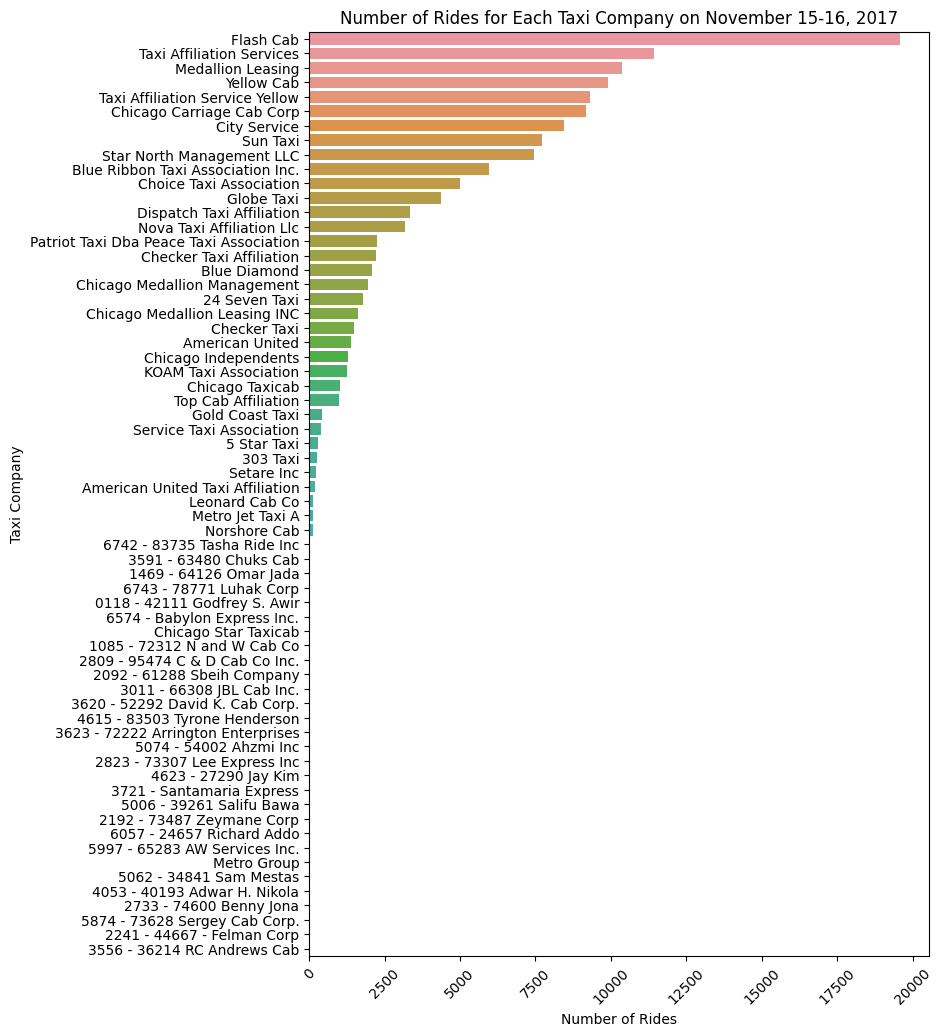

In [9]:
# Visualization of the number of trips each company makes

plt.figure(figsize=(8, 12))
sns.barplot(data=comp_and_trips, x='trips_amount', y='company_name')
plt.title('Number of Rides for Each Taxi Company on November 15-16, 2017')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.xticks(rotation = 45)
plt.show()

A small number of companies make up the majority of all taxi rides. In fact, the top 10 taxi companies account for more than half of all rides out of 64 different companies. This suggests some companies out compete other companies in certain areas around Chicago.

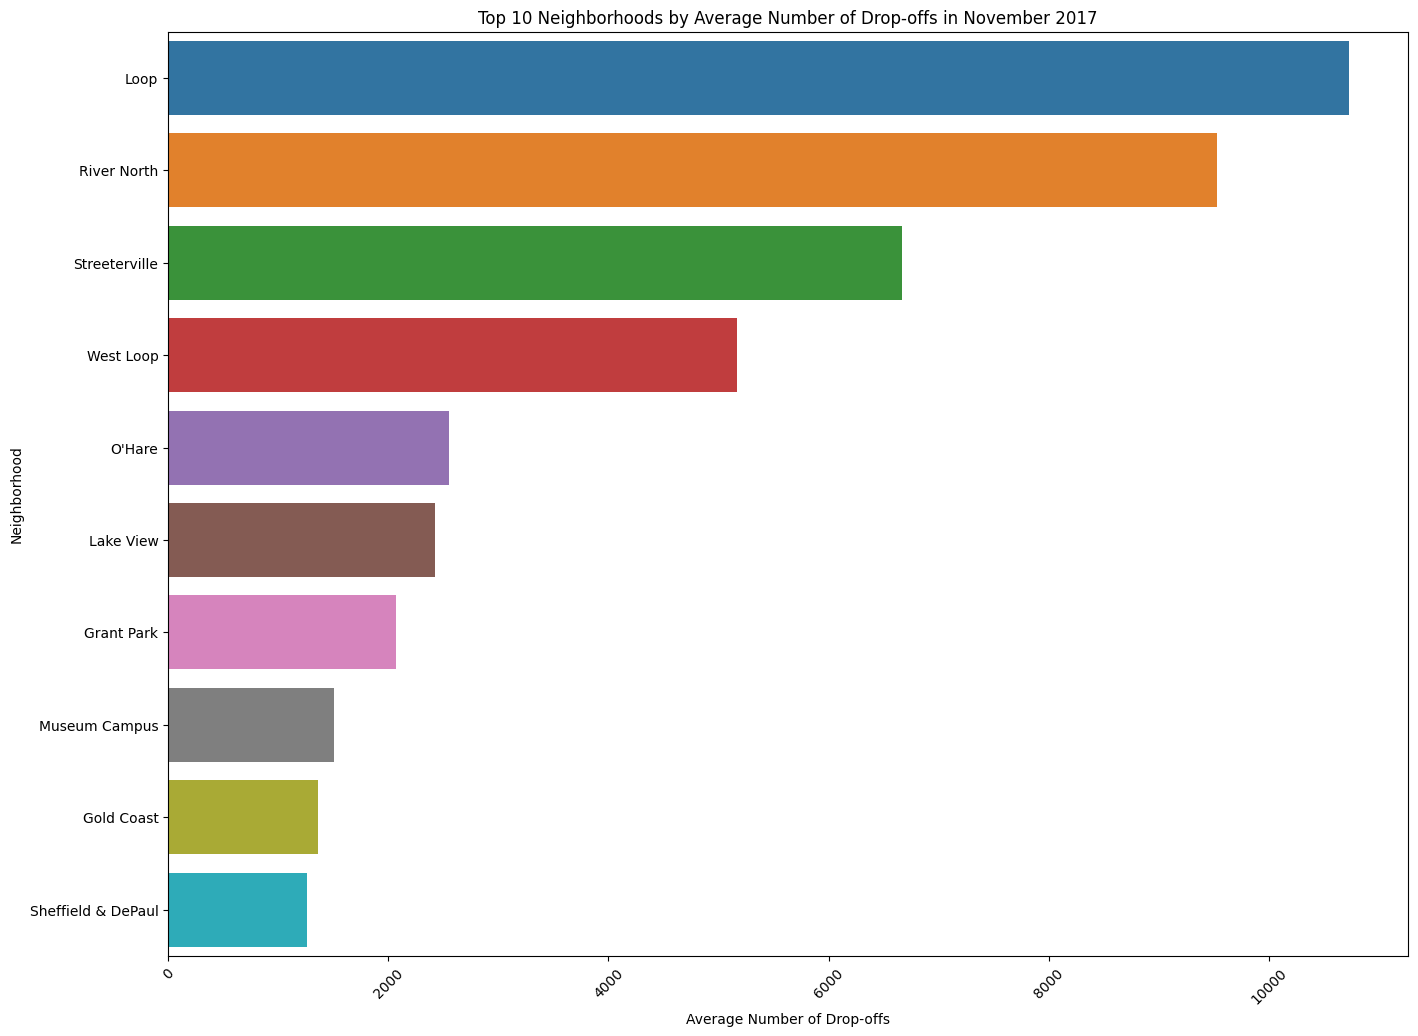

Average number of dropoffs for all neighborhoods: 4324.986666666667


In [10]:
# Visualization of the top 10 most popular neighborhoods by the number of rides that end in that neighborhood

plt.figure(figsize=(16, 12))
sns.barplot(data=top_10_hoods, x='average_trips', y='dropoff_location_name')
plt.title('Top 10 Neighborhoods by Average Number of Drop-offs in November 2017')
plt.xlabel('Average Number of Drop-offs')
plt.ylabel('Neighborhood')
plt.xticks(rotation = 45)
plt.show()
print('Average number of dropoffs for all neighborhoods:',top_10_hoods['average_trips'].mean())

The average of number of dropoffs across all locations is about 4325 dropoffs. There are four locations that have a value higher than the mean and the top four are Loop, River North, Streeterville, and West Loop. This tells us that these four locations have higher traffic volume and they are most likely population centers such as office buildings, living quarters, or malls/shopping locations. These areas need to be analylized for taxi planning decisions such as allocating more taxi drivers in those areas.

Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal to the average duration of rides on non-rainy Saturdays.

Alternative hypothesis: The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is not equal to the average duration of rides on non-rainy Saturdays.

Use the conventional 0.05 alpha value.

This test will be comparing the means of two independent populations, so a independent two sample t-test will be used. The null hypothesis says the two means are equal, and the alternative says the two means are not equal.

In [11]:
# Get all rides that take place on a Saturday

saturday_rides = airport_rides.loc[airport_rides['start_ts'].dt.weekday == 5]
saturday_rides

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [12]:
# Get all rides that are on a rainy day and get all rides that were not on a rainy day

saturday_rides_rainy = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
saturday_rides_no_rain = saturday_rides[saturday_rides['weather_conditions'] == 'Good']

In [13]:
# Run a t-test to test the null hypothesis

t_stat, p_value = st.ttest_ind(saturday_rides_rainy['duration_seconds'], saturday_rides_no_rain['duration_seconds'])
print('t_stat', t_stat)
print('p_value', p_value)

alpha = 0.05

if(p_value < alpha):
    print("Reject the null hypothesis: There is a significant difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.")

t_stat 5.427957689754561
p_value 7.397770692813658e-08
Reject the null hypothesis: There is a significant difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.


The p_value returned is less than the significance level of 0.05, meaning we reject the null hypothesis since there is strong evidence against it and the alternative is more likely to possibly be true. This is appropriate since weather can affect traffic causing accidents and delays, making trips last longer compared to days with nicer weather. 

## Conclusion
Ultimately, the visualizations show that a few taxi companies dominate the market in terms of the number of rides they receive compared to the samller companies. The visualizations also show how many dropoffs each of the top ten neighborhoods have. Together, these visualizations give us an idea on which neighborhoods Zuber drivers should be patrolling and who are the top competitors in those areas to be competing against. From the t-test results combined with the visualizations, Zuber can use this analysis to gain an edge over their competitors. For instnace, Zuber can adjust its rates based on competitors' rates to better appeal to customers or adjust its rates in response to weather patterns. Zuber can increase the number of drivers in a particular neighborhood to accomodate high demand or increase the number of drivers to accomodate the increase in trip durations that could be caused to due bad weather. With this analysis, Zuber has the tools to make informed business decisions to make the business successful.